<h1>HW-Chao Li<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Packages" data-toc-modified-id="Packages-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Packages</a></span></li><li><span><a href="#Data" data-toc-modified-id="Data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Data</a></span><ul class="toc-item"><li><span><a href="#Data-processing" data-toc-modified-id="Data-processing-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Data processing</a></span></li><li><span><a href="#train-test-split" data-toc-modified-id="train-test-split-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>train test split</a></span></li><li><span><a href="#Missing-values" data-toc-modified-id="Missing-values-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Missing values</a></span></li><li><span><a href="#Data-distribution" data-toc-modified-id="Data-distribution-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Data distribution</a></span></li><li><span><a href="#Data-transform" data-toc-modified-id="Data-transform-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Data transform</a></span></li></ul></li><li><span><a href="#Modelling" data-toc-modified-id="Modelling-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Modelling</a></span><ul class="toc-item"><li><span><a href="#Standardlization" data-toc-modified-id="Standardlization-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Standardlization</a></span></li><li><span><a href="#OLS" data-toc-modified-id="OLS-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>OLS</a></span></li><li><span><a href="#Lasso" data-toc-modified-id="Lasso-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Lasso</a></span></li><li><span><a href="#ElasticNet" data-toc-modified-id="ElasticNet-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>ElasticNet</a></span></li><li><span><a href="#Decision-Tree" data-toc-modified-id="Decision-Tree-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Decision Tree</a></span></li><li><span><a href="#Bagging-regressor" data-toc-modified-id="Bagging-regressor-3.6"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>Bagging regressor</a></span></li><li><span><a href="#Random-forest" data-toc-modified-id="Random-forest-3.7"><span class="toc-item-num">3.7&nbsp;&nbsp;</span>Random forest</a></span></li><li><span><a href="#Gradient-Boosting" data-toc-modified-id="Gradient-Boosting-3.8"><span class="toc-item-num">3.8&nbsp;&nbsp;</span>Gradient Boosting</a></span></li><li><span><a href="#LGboosting" data-toc-modified-id="LGboosting-3.9"><span class="toc-item-num">3.9&nbsp;&nbsp;</span>LGboosting</a></span></li><li><span><a href="#Neural-Network" data-toc-modified-id="Neural-Network-3.10"><span class="toc-item-num">3.10&nbsp;&nbsp;</span>Neural Network</a></span></li></ul></li><li><span><a href="#Model-evaluation" data-toc-modified-id="Model-evaluation-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Model evaluation</a></span></li><li><span><a href="#Final-prediction" data-toc-modified-id="Final-prediction-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Final prediction</a></span><ul class="toc-item"><li><span><a href="#Data-processing" data-toc-modified-id="Data-processing-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Data processing</a></span></li><li><span><a href="#OLS-model" data-toc-modified-id="OLS-model-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>OLS model</a></span></li><li><span><a href="#NN-model" data-toc-modified-id="NN-model-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>NN model</a></span></li><li><span><a href="#Prediction-stacking" data-toc-modified-id="Prediction-stacking-5.4"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>Prediction stacking</a></span></li><li><span><a href="#Saving-result" data-toc-modified-id="Saving-result-5.5"><span class="toc-item-num">5.5&nbsp;&nbsp;</span>Saving result</a></span></li></ul></li></ul></div>

Author: Chao Li

time: 20220404

email: cholianli0518@gmail.com

# Packages

In [185]:
import pandas as pd
from pandas.tseries.offsets import MonthEnd
import numpy as np
import seaborn as sns

In [186]:
import warnings

warnings.filterwarnings("ignore")

In [187]:
sns.set_context('notebook') 
sns.set_theme()
%matplotlib inline

# Data

In [188]:
Preci_ori = pd.read_csv('Daily Precipitation.csv')
Soil_ori = pd.read_csv('Daily Soil Mositure.csv')
Temp_ori = pd.read_csv('Daily Temperature.csv')
NDVI_ori = pd.read_csv('Eight Day NDVI.csv')
Quality_ori = pd.read_csv('Production Quantity.csv')

## Data processing

In [189]:
def data_process_datatype(data):
    
    # adjust the datatype
    data.start_date = pd.to_datetime(data.start_date)
    data.end_date = pd.to_datetime(data.end_date)
    
    # arrange the day of the datetime with the first day and the end of the day
    data.start_date = data.start_date.dt.to_period('M').dt.to_timestamp()
    data.end_date = data.end_date.dt.to_period('M').dt.to_timestamp()+MonthEnd(1)
    
    # strift time with the same type (ISO format)
    data.start_date = data.start_date.dt.strftime('%Y-%m-%dT00:00:00.000Z')
    data.end_date = data.end_date.dt.strftime('%Y-%m-%dT00:00:00.000Z')

    # groupby the data and sum up the value
    data = data.groupby(by = ['end_date','region_id'],as_index=False).sum().sort_values(by = ['region_id','end_date'])
    data['start_date'] = pd.to_datetime(data.end_date).dt.strftime('%Y-%m-01T00:00:00.000Z')
    
    # reset the index and reorder the columns
    data = data.reset_index(drop=True)
    data = data.iloc[:,[3,0,1,2]]
    return data

In [ ]:
# processing data
Preci_df = data_process_datatype(Preci_ori.copy())
Soil_df = data_process_datatype(Soil_ori.copy())
Temp_df = data_process_datatype(Temp_ori.copy())
NDVI_df = data_process_datatype(NDVI_ori.copy())
Quality_df = data_process_datatype(Quality_ori.copy())

# merge data
data = pd.merge(Preci_df,Soil_df,on = ['start_date','end_date','region_id'], how = 'outer')
data = pd.merge(data,Temp_df,on = ['start_date','end_date','region_id'], how = 'outer')
data = pd.merge(data,NDVI_df,on = ['start_date','end_date','region_id'], how = 'outer')
data = pd.merge(data,Quality_df,on = ['start_date','end_date','region_id'], how = 'outer')

In [357]:
train_df = data[(pd.to_datetime(data.start_date).dt.year <= 2019).values & (pd.to_datetime(data.start_date).dt.year >= 2015).values]
test_df = data[(pd.to_datetime(data.start_date).dt.year == 2020).values]
final_df = data[(pd.to_datetime(data.start_date).dt.year == 2021).values]

## train test split

In [190]:
# train test split
train_df = data[(pd.to_datetime(data.start_date).dt.year <= 2019).values & (pd.to_datetime(data.start_date).dt.year >= 2015).values]
test_df = data[(pd.to_datetime(data.start_date).dt.year == 2020).values]
final_df = data[(pd.to_datetime(data.start_date).dt.year == 2021).values]

## Missing values

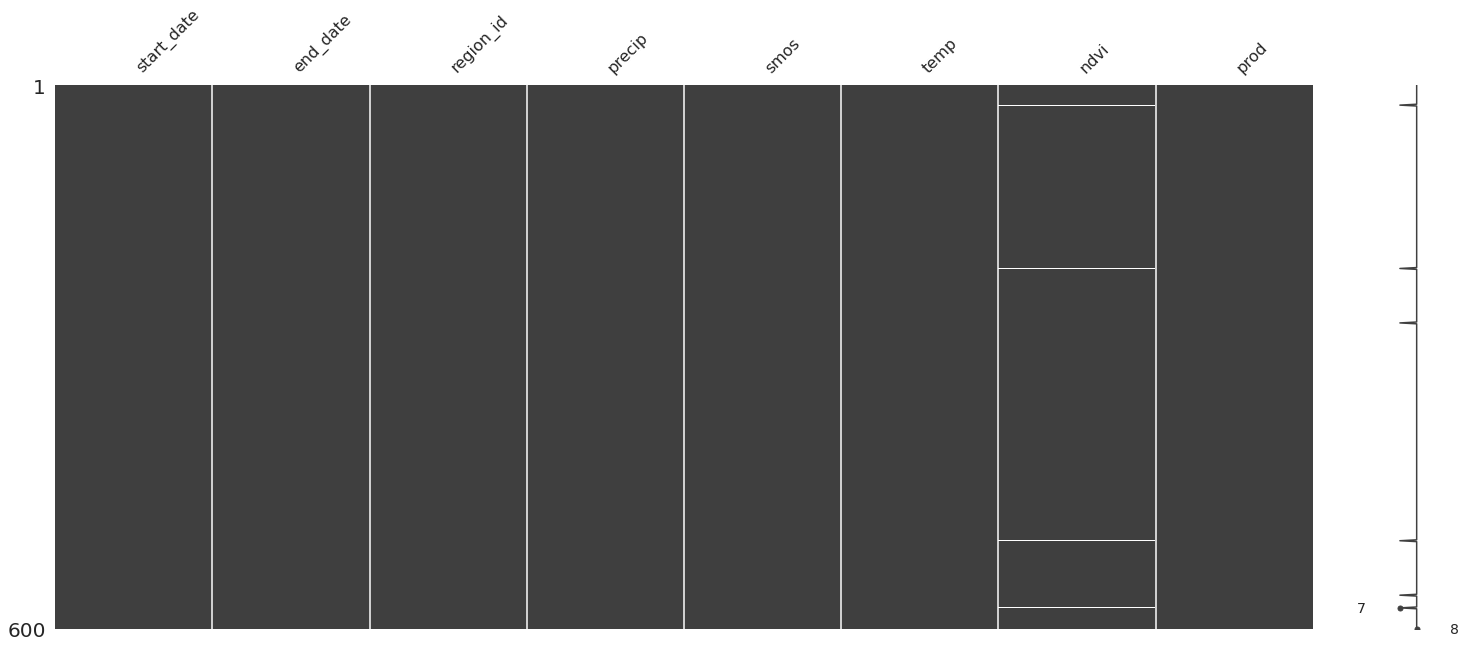

In [194]:
import matplotlib.pyplot as plt
import missingno as msno
# missing value EDA
# reference: https://www.geeksforgeeks.org/python-visualize-missing-values-nan-values-using-missingno-library/
msno.matrix(train_df)
plt.show()

In [195]:
X_train = train_df.iloc[:,2:-1]
y_train = train_df.iloc[:,-1]

X_test = test_df.iloc[:,2:-1]
y_test = test_df.iloc[:,-1]

X_final = final_df.iloc[:,2:-1]

In [196]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# Handle with the null value by imputation method.
unmissing_df_train = X_train[~X_train['ndvi'].isnull()]
missing_df_train = X_train[X_train['ndvi'].isnull()]
missing_df_test = X_test[X_test['ndvi'].isnull()]

impute = IterativeImputer()
impute.fit(unmissing_df_train)
missing_df_train=impute.transform(missing_df_train)
missing_df_test=impute.transform(missing_df_test)

In [197]:
X_train[X_train['ndvi'].isnull()] = missing_df_train
X_test[X_test['ndvi'].isnull()] = missing_df_test

## Data distribution

In [198]:
def plot_dists(X, kde=True,plots_in_col = 3,bins = None):

    labels = list(X.columns)
    
    N, p = X.shape

    rows = int(np.ceil(p/plots_in_col)) 

    fig, axes = plt.subplots(rows, plots_in_col, figsize=(12, rows*(12/4)))

    for i, ax in enumerate(fig.axes):
        if i < p:
            sns.distplot(X.iloc[:,i], ax=ax, kde=kde, hist_kws={'alpha': 0.9, 'edgecolor':'black'},  
                kde_kws={'color': 'black', 'alpha': 0.7},bins = bins)
            ax.set_xlabel('')
            ax.set_ylabel('')
            ax.set_title(labels[i])
            ax.set_yticks([])
        else:
            fig.delaxes(ax)

    sns.despine()
    plt.tight_layout()
    
    return fig, 

In [199]:
dist_df = X_train.copy()
dist_df['y'] = y_train.astype('int')

descriptive_fe = dist_df.describe()
descriptive_fe.loc['skew',:] = dist_df.skew()
descriptive_fe.loc['kurtosis',:] = dist_df.kurt()
descriptive_fe.round(3)

,region_id,precip,smos,temp,ndvi,y
count,600.000,600.000,600.000,600.000,600.000,600.000
mean,99.000,214.168,7.680,354.615,2.716,159222.125
std,4.102,108.536,2.063,155.256,0.620,143943.317
min,93.000,5.511,1.978,26.353,0.712,11181.000
25%,95.000,135.462,6.214,249.029,2.391,35344.000
50%,98.500,202.500,7.724,349.731,3.004,91945.500
75%,103.000,278.263,9.118,462.084,3.230,266665.500
max,105.000,636.077,13.070,833.288,3.380,593579.000
skew,0.026,0.632,-0.040,0.140,-1.146,0.795
kurtosis,-1.424,0.625,-0.270,-0.354,0.876,-0.525


93.0


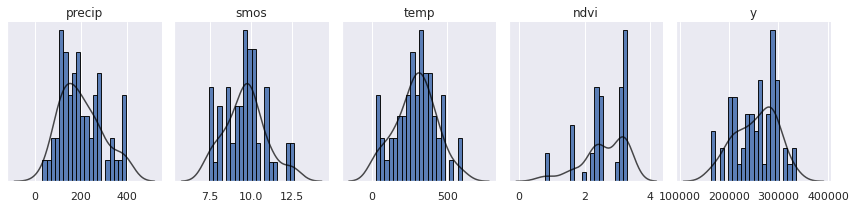

94.0


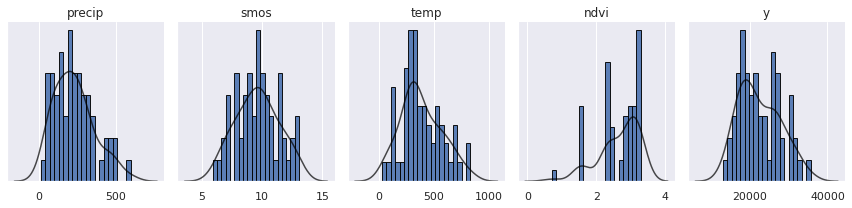

95.0


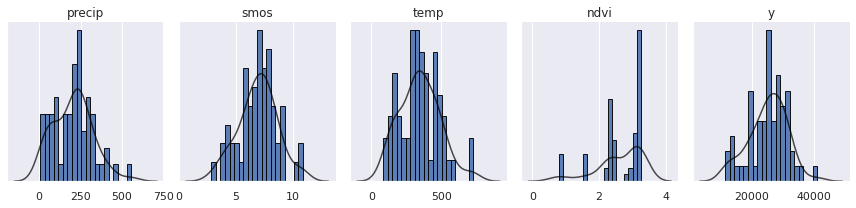

97.0


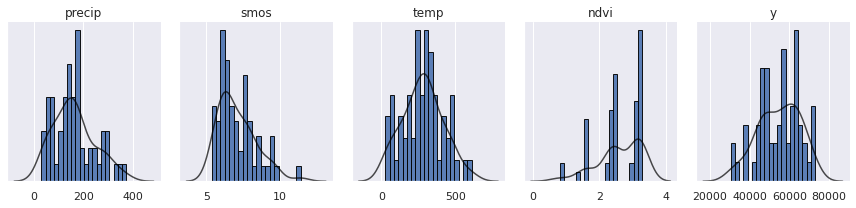

98.0


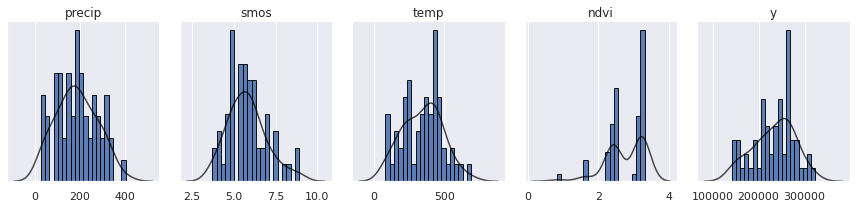

99.0


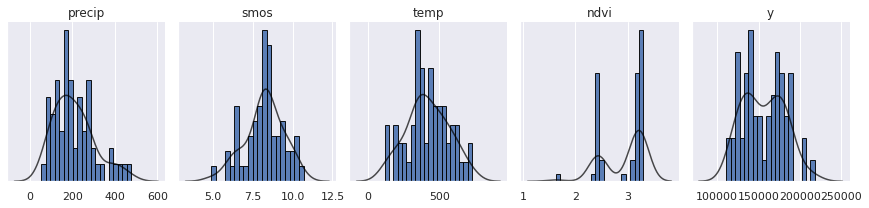

102.0


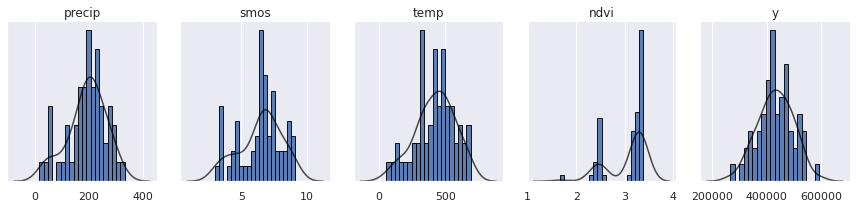

103.0


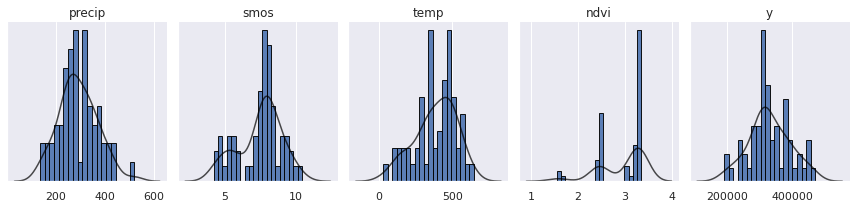

104.0


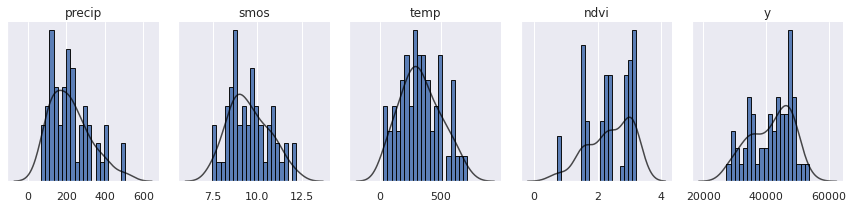

105.0


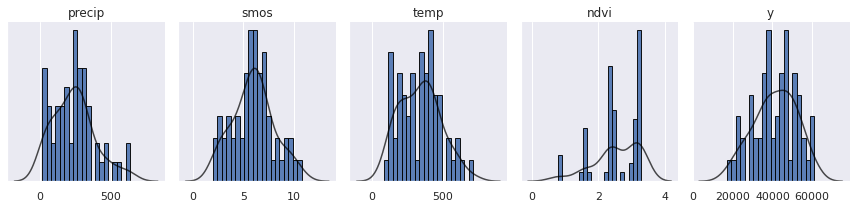

In [200]:
for i in dist_df.region_id.value_counts().index:
    print(i)
    plot_dists(dist_df[dist_df.region_id == i].iloc[:,1:],plots_in_col=5,bins = 20)
    plt.show()

In [201]:
def plot_regressions(X, y, lowess=False,plots_in_col = 3):

		## ref https://github.com/mscharth/qbus6810/blob/master/statlearning.py
    labels = list(X.columns)
    
    N, p = X.shape

    rows = int(np.ceil(p/plots_in_col)) 

    fig, axes = plt.subplots(rows, plots_in_col, figsize=(12, rows*(12/4)))

    for i, ax in enumerate(fig.axes):
        if i < p:
            sns.regplot(X.iloc[:,i], y,  ci=None, y_jitter=0.05, 
                        scatter_kws={'s': 25, 'alpha':.8}, ax=ax, lowess=lowess)
            ax.set_xlabel('')
            ax.set_ylabel('')
            ax.set_title(labels[i])
        else:
            fig.delaxes(ax)

    sns.despine()
    plt.tight_layout()
    
    return fig, axes

93.0


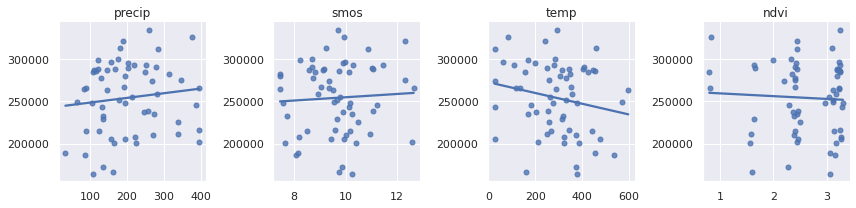

94.0


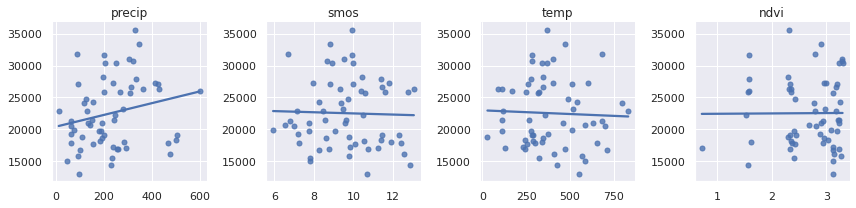

95.0


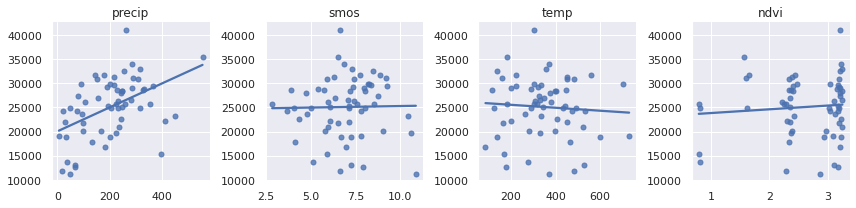

97.0


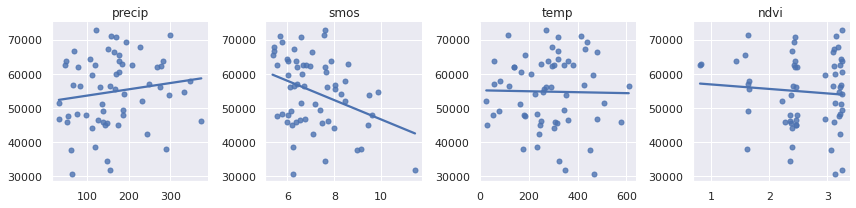

98.0


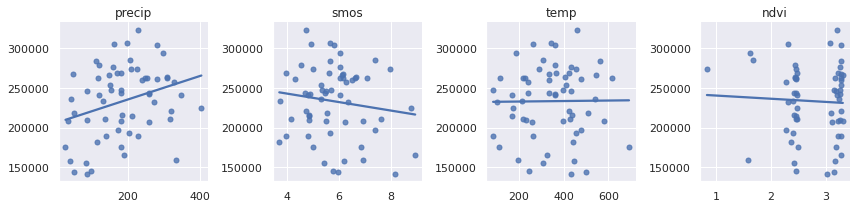

99.0


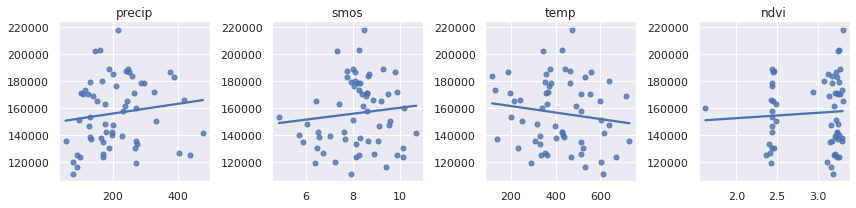

102.0


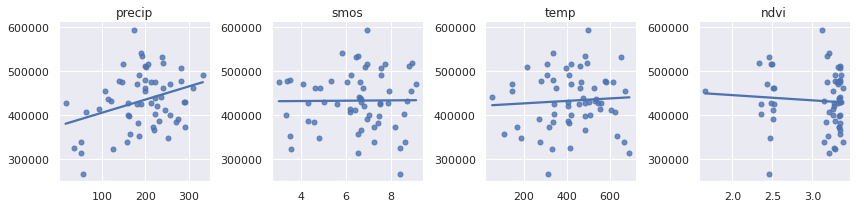

103.0


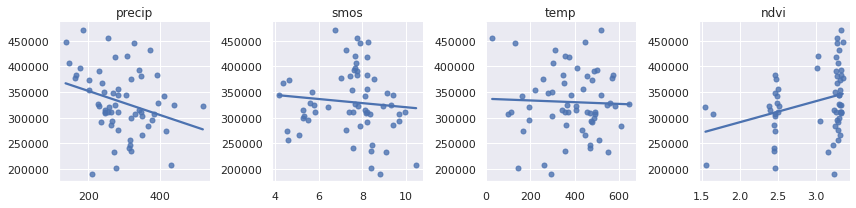

104.0


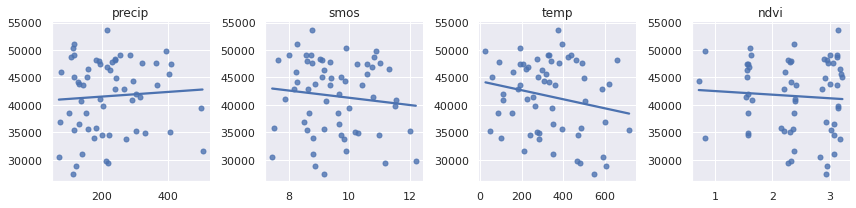

105.0


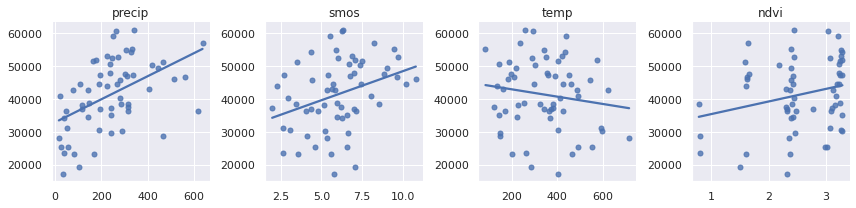

In [202]:
for i in dist_df.region_id.value_counts().index:
    print(i)
    plot_regressions(dist_df[dist_df.region_id == i].iloc[:,1:-1], dist_df[dist_df.region_id == i].iloc[:,-1],plots_in_col = 4)
    plt.show()

In [203]:
def plot_boxplots(X, category = None, plots_in_col = 3):

    ## ref https://github.com/mscharth/qbus6810/blob/master/statlearning.py
    labels = list(X.columns)
    
    N, p = X.shape

    rows = int(np.ceil(p/plots_in_col)) 

    fig, axes = plt.subplots(rows, plots_in_col, figsize=(12, rows*(12/4)))

    for i, ax in enumerate(fig.axes):
        if i < p:
            sns.boxplot(y = X.iloc[:,i], x = category,  orient = 'v', ax=ax)
            ax.set_xlabel('')
            ax.set_ylabel('')
            ax.set_title(labels[i])
        else:
            fig.delaxes(ax)

    sns.despine()
    plt.tight_layout()
    
    return fig, axes

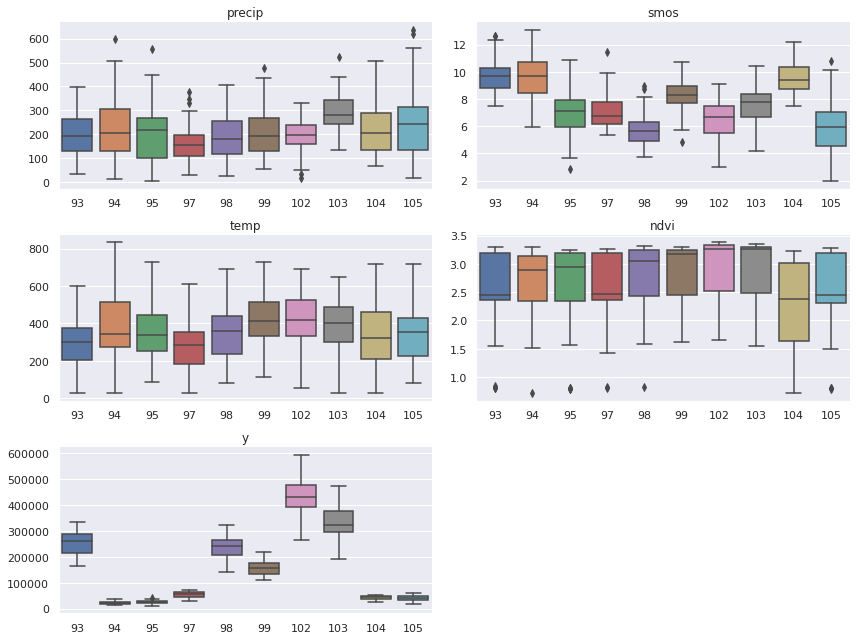

In [204]:
plot_boxplots(dist_df.iloc[:,1:],dist_df.iloc[:,0].astype('int'),plots_in_col=2)
plt.show()

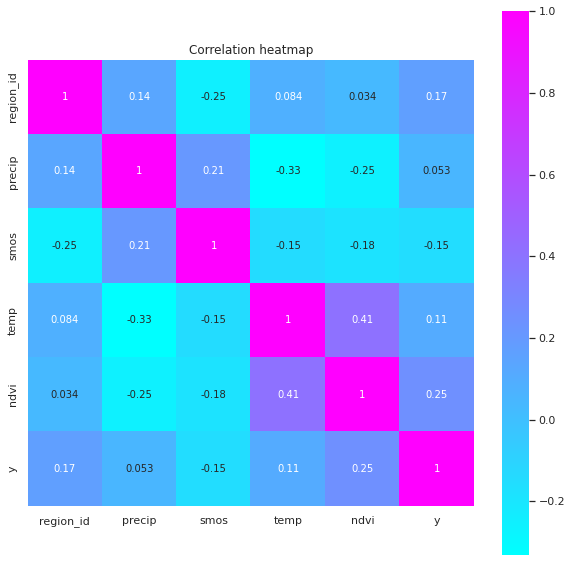

In [205]:
plt.subplots(figsize = (10,10))
# EDA
sns.heatmap(dist_df.corr(), square = True, annot = True, cmap = 'cool')
plt.title('Correlation heatmap')
plt.show()

## Data transform

In [206]:
dum_region_id_train = pd.get_dummies(X_train['region_id'].astype('int').astype('str'),drop_first=True)
X_train = X_train.drop('region_id',axis=1)

dum_region_id_test = pd.get_dummies(X_test['region_id'].astype('int').astype('str'),drop_first=True)
X_test = X_test.drop('region_id',axis=1)

# Modelling

## Standardlization

In [209]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train.iloc[:,:] = scaler.fit_transform(X_train)
X_test.iloc[:,:] = scaler.transform(X_test)

X_train = pd.concat([X_train, dum_region_id_train],axis = 1)

X_test = pd.concat([X_test, dum_region_id_test],axis = 1)

from sklearn.preprocessing import MinMaxScaler
scaler_mm = MinMaxScaler()
y_train = scaler_mm.fit_transform(y_train.to_numpy().reshape(-1,1))

## OLS

In [210]:
from sklearn.linear_model import LinearRegression
# model fitting
ols_model = LinearRegression(fit_intercept = True)
ols_model.fit(X_train, y_train)

ols_pred = ols_model.predict(X_test)
ols_pred = scaler_mm.inverse_transform(ols_pred)

## Lasso

In [219]:
from sklearn.linear_model import LassoCV

# model fitting
lasso = LassoCV(cv=5)
lasso.fit(X_train, y_train)

lasso_pred = lasso.predict(X_test)
lasso_pred = scaler_mm.inverse_transform(lasso_pred.reshape(-1,1))

## ElasticNet

In [220]:
from sklearn.linear_model import ElasticNetCV
# model fitting
enet = ElasticNetCV(l1_ratio=[0.01,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.99],cv=5)
enet.fit(X_train, y_train)

enet_pred = enet.predict(X_test)
enet_pred = scaler_mm.inverse_transform(enet_pred.reshape(-1,1))

## Decision Tree

In [222]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import RandomizedSearchCV

dt_model = DecisionTreeRegressor()

tuning_parameters = {
    'min_samples_leaf':[_ for _ in range(1,20)],
    'max_depth':np.arange(1,30),
}

tree = RandomizedSearchCV(dt_model, tuning_parameters,
                         n_iter=20,cv=5,return_train_score=False)
tree.fit(X_train, y_train)

tree_pred = tree.predict(X_test)
tree_pred = scaler_mm.inverse_transform(tree_pred.reshape(-1,1))

## Bagging regressor

In [223]:
%time
from sklearn.ensemble import BaggingRegressor

# model fitting
bag_model = BaggingRegressor(n_estimators=5000,random_state=1)
bag_model.fit(X_train, y_train)

bag_pred = bag_model.predict(X_test)
bag_pred = scaler_mm.inverse_transform(bag_pred.reshape(-1,1))

CPU times: user 5 µs, sys: 0 ns, total: 5 µs
Wall time: 10.5 µs


## Random forest

In [224]:
from sklearn.ensemble import RandomForestRegressor

%time
rf_model = RandomForestRegressor()

tuning_parameters = {
    'n_estimators':np.arange(100,5000,100),
    'min_samples_leaf': np.arange(1,100,5),
    'max_features':np.arange(1, X_train.shape[1]),
}

rf_search = RandomizedSearchCV(rf_model, tuning_parameters,
                              cv=5, n_iter=20,
                              return_train_score=False, n_jobs=-1,
                              random_state = 20)
rf_search.fit(X_train, y_train)

rf_pred = rf_search.predict(X_test)
rf_pred = scaler_mm.inverse_transform(rf_pred.reshape(-1,1))

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 10.3 µs


## Gradient Boosting

In [226]:
from sklearn.ensemble import GradientBoostingRegressor

%time
# model fitting
gb_model = GradientBoostingRegressor()

tuning_parameters = {
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': np.arange(100,5000,500),
    'max_depth': np.arange(2,10,1),
    'subsample': np.arange(0.2,1,0.2)
}

gb_search = RandomizedSearchCV(gb_model, tuning_parameters, n_iter=20, cv=5,
                              return_train_score=False,n_jobs=-1)
gb_search.fit(X_train, y_train)
gb_pred = gb_search.predict(X_test)
gb_pred = scaler_mm.inverse_transform(gb_pred.reshape(-1,1))

CPU times: user 5 µs, sys: 0 ns, total: 5 µs
Wall time: 10.5 µs


## LGboosting

In [236]:
import lightgbm as lgb
%time

model = lgb.LGBMRegressor(objective='regression')

tuning_parameters = {
    'learning_rate': [0.01, 0.005, 0.1],
    'n_estimators': np.arange(100,5000,1000),
    'num_leaves': list(np.arange(2,64)),
    'subsample': [0.6, 0.8, 1.0],
}

lbst = RandomizedSearchCV(model, tuning_parameters,
                          cv=5, n_iter=20,n_jobs=-1, 
                          random_state = 87)
lbst.fit(X_train.to_numpy(), y_train)

lbst_pred = lbst.predict(X_test)
lbst_pred = scaler_mm.inverse_transform(lbst_pred.reshape(-1,1))

CPU times: user 6 µs, sys: 0 ns, total: 6 µs
Wall time: 11.2 µs


## Neural Network

In [276]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.layers import Dense

print("TensorFlow version:", tf.__version__)

# create ANN model
NN_model = keras.Sequential()
NN_model.add(Dense(units=5, input_dim=13, kernel_initializer='normal', activation='relu'))
NN_model.add(Dense(units=5, kernel_initializer='normal', activation='tanh'))
NN_model.add(Dense(1, kernel_initializer='normal'))
NN_model.compile(loss='mean_squared_error', optimizer='adam')
NN_model.fit(X_train, y_train ,batch_size = 5, epochs = 100, verbose=0)

# Generating Predictions on testing data
NN_pred = NN_model.predict(X_test)
NN_pred = scaler_mm.inverse_transform(NN_pred)

TensorFlow version: 2.8.0


# Model evaluation

In [256]:
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import r2_score

def matrics_pred(y_true,y_pred):
    r2 = r2_score(y_true, y_pred)
    mape = mean_absolute_percentage_error(y_true, y_pred,multioutput = 'uniform_average')

    return r2,mape

model_list = ['ols_model','lasso','enet','tree','bag_model','rf_model','gb_model','lbst','NN_model']
pred_list = [ols_pred,lasso_pred, enet_pred,tree_pred,bag_pred,rf_pred,gb_pred,lbst_pred,NN_pred]

# evaluation
mape_ls = []
r2_ls = []
for i in range(len(pred_list)):
    r2,mape = matrics_pred(y_test,pred_list[i])
    mape_ls.append(mape)
    r2_ls.append(r2)

In [278]:
result = pd.DataFrame({'model':model_list,'MAPE':mape_ls,'R2':r2_ls})
result

,model,MAPE,R2
0,ols_model,0.192893,0.930740
1,lasso,2.347570,-0.000082
2,enet,2.347570,-0.000082
3,tree,1.542809,0.411756
4,bag_model,0.421007,0.831877
5,rf_model,1.995101,0.280308
6,gb_model,0.569559,0.790388
7,lbst,1.527875,0.584254
8,NN_model,0.226215,0.926525


The OLS and NN perform better tahn other models

# Final prediction

## Data processing

After selecting the target model, we need to train against all the data

In [328]:
X_all = pd.concat([train_df,test_df]).iloc[:,2:-1]
y_all = pd.concat([train_df,test_df]).iloc[:,-1]

X_final = final_df.iloc[:,2:-1]

# Handle with the null value by imputation method.
unmissing_df_train = X_all[~X_all['ndvi'].isnull()]
missing_df_train = X_all[X_all['ndvi'].isnull()]
missing_df_test = X_final[X_final['ndvi'].isnull()]

impute = IterativeImputer()
impute.fit(unmissing_df_train)
missing_df_train=impute.transform(missing_df_train)
missing_df_test=impute.transform(missing_df_test)

X_all[X_all['ndvi'].isnull()] = missing_df_train
X_final[X_final['ndvi'].isnull()] = missing_df_test

# data transformation
X_all_dum = pd.get_dummies(X_all['region_id'].astype('int').astype('str'),drop_first=True)
X_all = X_all.drop('region_id',axis = 1)

X_final_dum = pd.get_dummies(X_final['region_id'].astype('int').astype('str'),drop_first=True)
X_final = X_final.drop('region_id',axis = 1)

X_all.iloc[:,:] = scaler.fit_transform(X_all)
X_final.iloc[:,:] = scaler.transform(X_final)

y = scaler_mm.fit_transform(y_all.to_numpy().reshape(-1,1))

X = pd.concat([X_all,X_all_dum],axis = 1)
X_final = pd.concat([X_final,X_final_dum],axis = 1)

## OLS model

In [ ]:
ols_model = LinearRegression(fit_intercept = True)
ols_model.fit(X, y)

ols_pred = ols_model.predict(X_final)
ols_pred = scaler_mm.inverse_transform(ols_pred)

## NN model

In [350]:
NN_model.fit(X, y,batch_size = 5, epochs = 100, verbose=0)
NN_pred = NN_model.predict(X_final)
NN_pred = scaler_mm.inverse_transform(NN_pred)

## Prediction stacking

In [351]:
final_pred = (NN_pred+ols_pred)/2

## Saving result

In [358]:
final_df['prod'] = final_pred

f = pd.read_csv('cholianli0518@gmail.com.csv')
f = f.drop('prod',axis = 1)
f = f.merge(final_df,how = 'left',on = ['start_date','end_date','region_id']).drop(['precip','smos','temp','ndvi'],axis = 1)

In [369]:
f.head()

,start_date,end_date,region_id,prod
0,2021-01-01T00:00:00.000Z,2021-01-31T00:00:00.000Z,93,284838.307981
1,2021-02-01T00:00:00.000Z,2021-02-28T00:00:00.000Z,93,249658.954143
2,2021-03-01T00:00:00.000Z,2021-03-31T00:00:00.000Z,93,259154.880826
3,2021-04-01T00:00:00.000Z,2021-04-30T00:00:00.000Z,93,260756.190060
4,2021-05-01T00:00:00.000Z,2021-05-31T00:00:00.000Z,93,257093.262939


In [370]:
f.to_csv('cholianli0518@gmail.com.csv',index = False)